In [1]:
# reading data
## Example with GridSearch CV
#https://stackoverflow.com/questions/38555650/try-multiple-estimator-in-one-grid-search/53292354
import csv
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import classification_report
import pandas as pd

In [4]:
path = 'hatespeech_text_label_vote_RESTRICTED_100K.csv'
!head hatespeech_text_label_vote_RESTRICTED_100K.csv
#tweet, label, number of voters

Beats by Dr. Dre urBeats Wired In-Ear Headphones - White https://t.co/9tREpqfyW4 https://t.co/FCaWyWRbpE	spam	4
RT @Papapishu: Man it would fucking rule if we had a party that was against perpetual warfare.	abusive	4
It is time to draw close to Him &#128591;&#127995; Father, I draw near to you now and always ❤️ https://t.co/MVRBBX2aqJ	normal	4
if you notice me start to act different or distant.. it's bc i peeped something you did or i notice a difference in how you act &amp; ian fw it.	normal	5
Forget unfollowers, I believe in growing. 7 new followers in the last day! Stats via https://t.co/bunPHQNXhj	normal	3
RT @Vitiligoprince: Hate Being sexually Frustrated Like I wanna Fuck But ion wanna Just fuck anybody	abusive	4
Topped the group in TGP Disc Jam Season 2! Onto the Semi-Finals! @HighHorseGames https://t.co/N7LE8lX7Rm	normal	3
That daily baby aspirin for your #heart just might be preventing colon #cancer too. https://t.co/2TLawmHhEe	normal	5
I liked a @YouTube video from @mattshea 

In [5]:
tweets = []
labels = []
with open(path) as fi:
    data = csv.reader(fi, delimiter='\t')
    for row in data:
        tweets.append(row[0])
        labels.append(row[1]) 

In [6]:
## sanity checks
len(tweets) == len(labels)

True

In [7]:
Counter(labels)

Counter({'spam': 14030, 'abusive': 27150, 'normal': 53851, 'hateful': 4965})

<BarContainer object of 4 artists>

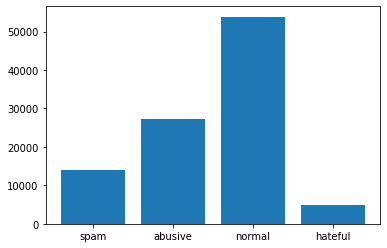

In [8]:
plt.bar(Counter(labels).keys(), Counter(labels).values())

In [7]:
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.2, random_state=42)

names = [
         "Naive Bayes",
         "Linear SVM",
         "Logistic Regression",
         "Random Forest"
        ]

classifiers = [
    MultinomialNB(),
    LinearSVC(),
    LogisticRegression(),
    RandomForestClassifier()
]

parameters = [
              {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__alpha': (1e-2, 1e-3)},
              {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__C': (np.logspace(-5, 1, 5))},
              {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__C': (np.logspace(-5, 1, 5))},
              {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__max_depth': (1, 2)}
             ]

class_report = []

for vec, n in zip([CountVectorizer(stop_words='english'), TfidfVectorizer(stop_words='english')], ["Count", "Tfidf"]):
    for name, classifier, params in zip(names, classifiers, parameters):
        clf_pipe = Pipeline([
            ('vect', vec),
            ('clf', classifier),
        ])

        gs_clf = GridSearchCV(clf_pipe, param_grid=params, cv=3, n_jobs=-1)
        clf = gs_clf.fit(X_train, y_train)


        score = clf.score(X_test, y_test)
        print("{} score: {}".format(name, score))

        print("{} are the best estimators".format(clf.best_estimator_))

        results_to_dict = classification_report((clf.best_estimator_.predict(X_test)), y_test, output_dict= True)

        results_to_dict['classifier'] = name
        results_to_dict['parameters'] = clf.best_params_
        results_to_dict['vectorizer'] = n
        class_report.append(results_to_dict)

Naive Bayes score: 0.7357
Pipeline(steps=[('vect',
                 CountVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('clf', MultinomialNB(alpha=0.01))]) are the best estimators
Linear SVM score: 0.8084
Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('clf', LinearSVC(C=0.01))]) are the best estimators


/Users/anne/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression score: 0.8073
Pipeline(steps=[('vect',
                 CountVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('clf', LogisticRegression(C=0.31622776601683794))]) are the best estimators
Random Forest score: 0.5424
Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('clf', RandomForestClassifier(max_depth=1))]) are the best estimators


/Users/anne/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anne/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anne/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes score: 0.74895
Pipeline(steps=[('vect',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('clf', MultinomialNB(alpha=0.01))]) are the best estimators
Linear SVM score: 0.80625
Pipeline(steps=[('vect', TfidfVectorizer(stop_words='english')),
                ('clf', LinearSVC(C=0.31622776601683794))]) are the best estimators


/Users/anne/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression score: 0.80095
Pipeline(steps=[('vect', TfidfVectorizer(stop_words='english')),
                ('clf', LogisticRegression(C=0.31622776601683794))]) are the best estimators
Random Forest score: 0.5424
Pipeline(steps=[('vect', TfidfVectorizer(stop_words='english')),
                ('clf', RandomForestClassifier(max_depth=1))]) are the best estimators


/Users/anne/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anne/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anne/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
def clean_metrics(df):
    i = ['precision', 'recall', 'support', 'f1-score']
    df[df['indicators'].isin(i)]
    df.reset_index(inplace=True)
    d = df[df['indicators'].isin(i)].groupby(['classifier',  'indicators', 'vectorizer']).max()
    return d

def clean_parameters(df):
    i= ['vect__ngram_range', 'clf__alpha', 'clf__C']

    df = df[df['indicators'].isin(i)].groupby(['classifier', 'indicators', 'vectorizer']).max()
    df.reset_index(inplace=True)
    e = df.groupby(['classifier', 'vectorizer']).apply(lambda g: pd.Series(g.parameters.values, index= + g.indicators.astype(str)))

    parameters = pd.DataFrame(e)
    parameters.reset_index(inplace=True)
    parameters['unique_'] = parameters['classifier'] + "_" +  parameters['vectorizer']
    p = parameters.pivot(index='unique_', columns='indicators', values=0)
    parameters = parameters.groupby(['classifier','vectorizer']).first()
    
    p.reset_index(inplace=True)
    len(p) == len(parameters)
    parameters.reset_index(inplace=True)
    parameters = pd.merge(p, parameters, on='unique_')
    return parameters

def get_cleaned_data(dataset):
    df = pd.merge(clean_metrics(dataset), clean_parameters(dataset), on=['classifier','vectorizer'], how='left')
    df.rename(columns={'index': 'metrics'}, inplace=True)
    print("..........loaded the data frame........")
    return df


appended_data = []
for i in class_report:
    data = pd.DataFrame.from_dict(i)
    appended_data.append(data)
df = pd.concat(appended_data)
df['indicators'] = df.index

b = get_cleaned_data(df)
b[b['metrics']=='f1-score']

..........loaded the data frame........


,classifier,vectorizer,metrics,abusive,hateful,normal,spam,accuracy,macro avg,weighted avg,parameters,unique_,clf__C,clf__alpha,vect__ngram_range,indicators,0
0,Linear SVM,Count,f1-score,0.888706,0.337580,0.862323,0.432354,0.80840,0.630241,0.833301,NaN,Linear SVM_Count,0.01,NaN,"(1, 1)",clf__C,0.01
1,Linear SVM,Tfidf,f1-score,0.889660,0.366261,0.856942,0.506543,0.80625,0.654852,0.819829,NaN,Linear SVM_Tfidf,0.316228,NaN,"(1, 1)",clf__C,0.316228
8,Logistic Regression,Count,f1-score,0.885246,0.373723,0.860984,0.479194,0.80730,0.649787,0.824413,NaN,Logistic Regression_Count,0.316228,NaN,"(1, 2)",clf__C,0.316228
9,Logistic Regression,Tfidf,f1-score,0.879874,0.317230,0.853462,0.497203,0.80095,0.636942,0.817426,NaN,Logistic Regression_Tfidf,0.316228,NaN,"(1, 1)",clf__C,0.316228
16,Naive Bayes,Count,f1-score,0.798579,0.323347,0.801100,0.506118,0.73570,0.607286,0.735600,NaN,Naive Bayes_Count,NaN,0.01,"(1, 2)",clf__alpha,0.01
17,Naive Bayes,Tfidf,f1-score,0.795077,0.278907,0.816575,0.463990,0.74895,0.588637,0.762727,NaN,Naive Bayes_Tfidf,NaN,0.01,"(1, 2)",clf__alpha,0.01
24,Random Forest,Count,f1-score,0.000000,0.000000,0.703320,0.000000,0.54240,0.175830,0.703320,NaN,Random Forest_Count,NaN,NaN,"(1, 1)",vect__ngram_range,"(1, 1)"
25,Random Forest,Tfidf,f1-score,0.000000,0.000000,0.703320,0.000000,0.54240,0.175830,0.703320,NaN,Random Forest_Tfidf,NaN,NaN,"(1, 1)",vect__ngram_range,"(1, 1)"


In [10]:
for i in class_report:
    data = pd.DataFrame.from_dict(i)
    appended_data.append(data)
df = pd.concat(appended_data)
df['indicators'] = df.index

df = clean_metrics(df)
df

index      abusive     hateful  \
classifier          indicators vectorizer                                       
Linear SVM          f1-score   Count        f1-score     0.888706    0.337580   
                               Tfidf        f1-score     0.889660    0.366261   
                    precision  Count       precision     0.904265    0.219462   
                               Tfidf       precision     0.907804    0.249482   
                    recall     Count          recall     0.873673    0.731034   
                               Tfidf          recall     0.872226    0.688571   
                    support    Count         support  5557.000000  290.000000   
                               Tfidf         support  5588.000000  350.000000   
Logistic Regression f1-score   Count        f1-score     0.885246    0.373723   
                               Tfidf        f1-score     0.879874    0.317230   
                    precision  Count       precision     0.895139    0.265010   
                               Tfidf       precision     0.884709    0.203934   
                    recall     Count          recall     0.875569    0.633663   
                               Tfidf          recall     0.875092    0.713768   
                    support    Count         support  5489.000000  404.000000   
                               Tfidf         support  5428.000000  276.000000   
Naive Bayes         f1-score   Count        f1-score     0.798579    0.323347   
                               Tfidf        f1-score     0.795077    0.278907   
                    precision  Count       precision     0.816353    0.324017   
                               Tfidf       precision     0.806109    0.206004   
                    recall     Count          recall     0.781562    0.322680   
                               Tfidf          recall     0.784342    0.431670   
                    support    Count         support  5608.000000  970.000000   
                               Tfidf         support  5518.000000  461.000000   
Random Forest       f1-score   Count        f1-score     0.000000    0.000000   
                               Tfidf        f1-score     0.000000    0.000000   
                    precision  Count       precision     0.000000    0.000000   
                               Tfidf       precision     0.000000    0.000000   
                    recall     Count          recall     0.000000    0.000000   
                               Tfidf          recall     0.000000    0.000000   
                    support    Count         support     0.000000    0.000000   
                               Tfidf         support     0.000000    0.000000   

                                                 normal         spam  \
classifier          indicators vectorizer                              
Linear SVM          f1-score   Count           0.862323     0.432354   
                               Tfidf           0.856942     0.506543   
                    precision  Count           0.940542     0.318779   
                               Tfidf           0.898968     0.446574   
                    recall     Count           0.796114     0.671653   
                               Tfidf           0.818670     0.585116   
                    support    Count       12816.000000  1337.000000   
                               Tfidf       11912.000000  2150.000000   
Logistic Regression f1-score   Count           0.860984     0.479194   
                               Tfidf           0.853462     0.497203   
                    precision  Count           0.920907     0.388356   
                               Tfidf           0.910029     0.425985   
                    recall     Count           0.808383     0.625500   
                               Tfidf           0.803516     0.597015   
                    support    Count       12358.000000  1749.000000   
                               Tfidf       12286.000000  2010.000000